In [1]:
from __future__ import print_function
%matplotlib inline
#import ganymede
#ganymede.configure('uav.beaver.works')
import matplotlib.pyplot as plt
import numpy as np
import sympy as sym
from IPython.display import YouTubeVideo, HTML
sym.init_printing(use_latex = "mathjax")

### Enter your name below and run the cell:

Individual cells can be run with `Ctrl` + `Enter`

In [2]:
#ganymede.name('YOUR NAME HERE')
#def check(p):
#    ganymede.update(p,True)
#check(0)

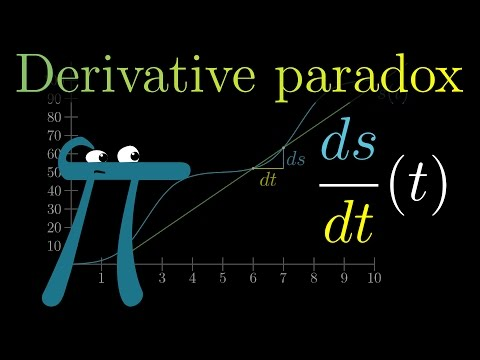

In [3]:
YouTubeVideo('9vKqVkMQHKk', width=560, height=315) # Video by http://www.3blue1brown.com/

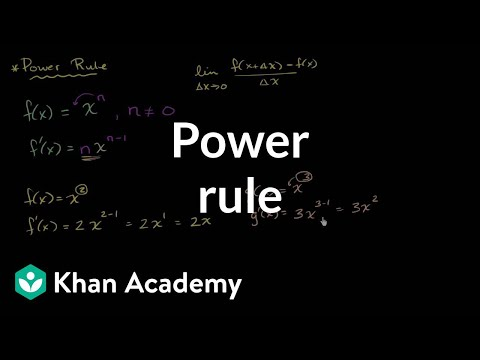

In [4]:
YouTubeVideo('bRZmfc1YFsQ', width=560, height=315) #Note: All Khan Academy content is available for free at khanacademy.org

### Power Rule

The derivative of $x^n$ is $nx^{n-1}$

[Read more](https://www.mathsisfun.com/calculus/power-rule.html)

[Other derivative rules](https://www.mathsisfun.com/calculus/derivatives-rules.html)

In [5]:
# Creating algebraic symbols 
x = sym.symbols('x')
x

x

In [6]:
x = sym.symbols('x')
expr = x ** 2
expr

 2
x 

In [7]:
sym.Derivative(expr) # does not actually compute the derivative

d ⎛ 2⎞
──⎝x ⎠
dx    

In [8]:
sym.Derivative(expr).doit()

2⋅x

In [9]:
sym.diff(expr) #equivalent to doit()

2⋅x

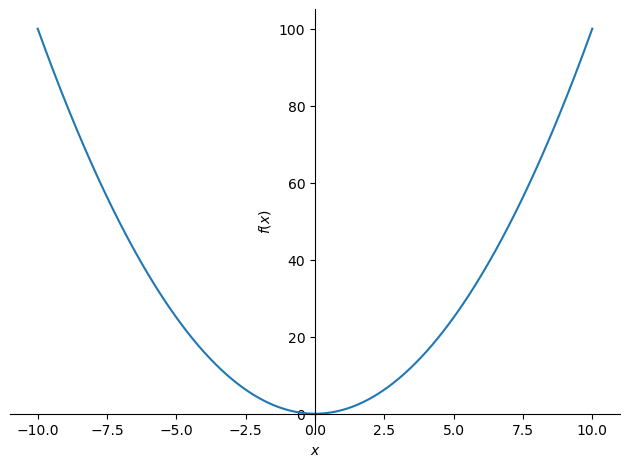

In [10]:
sym.plot(expr);

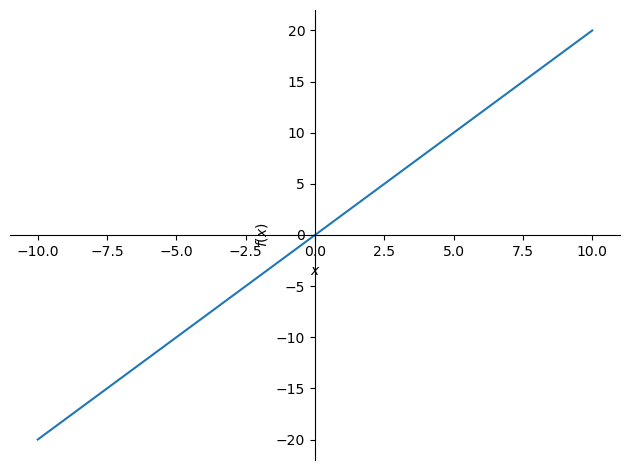

In [11]:
sym.plot(sym.diff(expr));

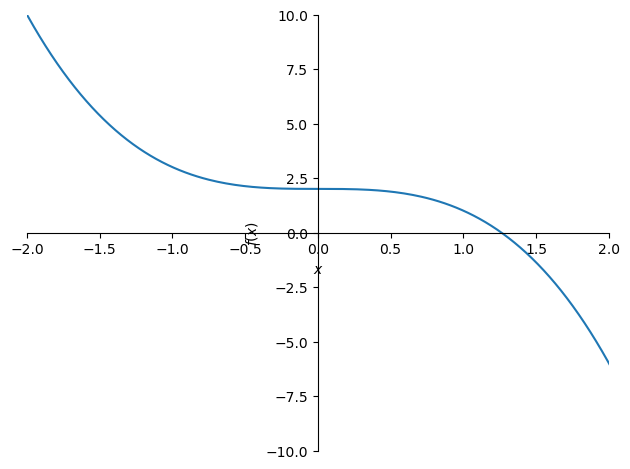

In [12]:
x = sym.symbols('x')
expr = -x ** 3 + 2

sym.plot(expr, xlim=(-2, 2), ylim=(-10, 10));

In [13]:
sym.Derivative(expr)

d ⎛     3⎞
──⎝2 - x ⎠
dx        

In [14]:
sym.Derivative(expr).doit()

    2
-3⋅x 

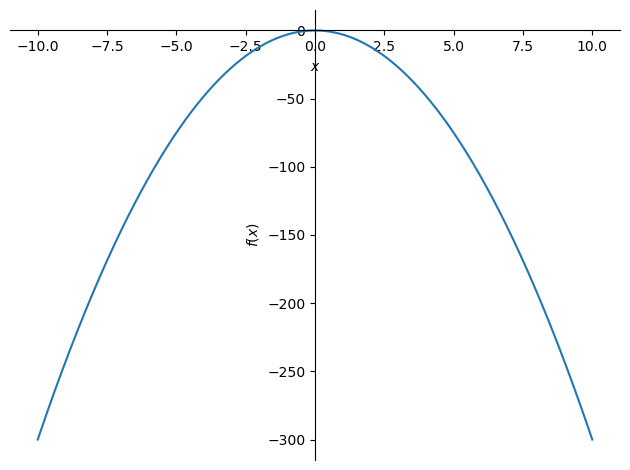

In [15]:
sym.plot(sym.diff(expr));

Now, let's generate a fake one-dimensional signal:

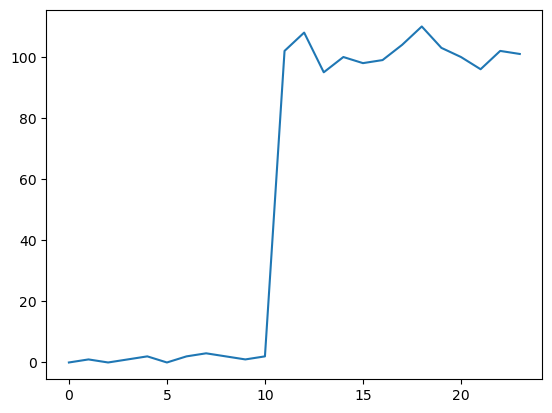

In [16]:
ys = np.array([0, 1, 0, 1, 2, 0, 2, 3, 2, 1, 2, 102, 108,  95, 100,  98,  99, 104, 110, 103, 100,  96, 102, 101])

fig,ax = plt.subplots()
ax.plot([i for i in range(len(ys))], ys);
#check(1)

Next, let's look at small chunks of our fake signal:

In [17]:
chunks = np.split(ys, len(ys)//2)
print(chunks)
#check(2)

[array([0, 1]), array([0, 1]), array([2, 0]), array([2, 3]), array([2, 1]), array([  2, 102]), array([108,  95]), array([100,  98]), array([ 99, 104]), array([110, 103]), array([100,  96]), array([102, 101])]


**Question:** Which one of these chunks would you say is the most "interesting"?

**Question** If we always divide up the signal as we did above, will we always find something "interesting"?

## Convolutions

Derivatives and convolutions are one technique to help us tackle the above problem. 

First, you'll need to generate windows into the signal. Write a function that can generate windows with a user-supplied windowsize, and print them out.

An example signal with 3 window sizes is shown below. Your output does not need to replicate the formatting shown, but they should produce the same windows. E.g., given an input signal of `[10,20,30]` and a `windowsize=2`, your function should return `[[10,20], [20,30]]`.

### A windowsize of 1:

```
signal:
        0   1   0   2   1   0   1 101 100  98 102 101
 0:     0
 1: ____    1
 2: ________    0
 3: ____________    2
 4: ________________    1
 5: ____________________    0
 6: ________________________    1
 7: ____________________________  101
 8: ________________________________  100
 9: ____________________________________   98
10: ________________________________________  102
11: ____________________________________________  101

	 :::::::::::::::::::::::::::::::::::::::::::::::::: 

i:    0 |  i + windowsize:     1  |  window:  [   0]
i:    1 |  i + windowsize:     2  |  window:  [   1]
i:    2 |  i + windowsize:     3  |  window:  [   0]
i:    3 |  i + windowsize:     4  |  window:  [   2]
i:    4 |  i + windowsize:     5  |  window:  [   1]
i:    5 |  i + windowsize:     6  |  window:  [   0]
i:    6 |  i + windowsize:     7  |  window:  [   1]
i:    7 |  i + windowsize:     8  |  window:  [ 101]
i:    8 |  i + windowsize:     9  |  window:  [ 100]
i:    9 |  i + windowsize:    10  |  window:  [  98]
i:   10 |  i + windowsize:    11  |  window:  [ 102]
i:   11 |  i + windowsize:    12  |  window:  [ 101]
```

### A windowsize of 2:

```
signal:
        0   1   0   2   1   0   1 101 100  98 102 101
 0:     0   1
 1: ____    1   0
 2: ________    0   2
 3: ____________    2   1
 4: ________________    1   0
 5: ____________________    0   1
 6: ________________________    1 101
 7: ____________________________  101 100
 8: ________________________________  100  98
 9: ____________________________________   98 102
10: ________________________________________  102 101

	 :::::::::::::::::::::::::::::::::::::::::::::::::: 

i:    0 |  i + windowsize:     2  |  window:  [   0,   1]
i:    1 |  i + windowsize:     3  |  window:  [   1,   0]
i:    2 |  i + windowsize:     4  |  window:  [   0,   2]
i:    3 |  i + windowsize:     5  |  window:  [   2,   1]
i:    4 |  i + windowsize:     6  |  window:  [   1,   0]
i:    5 |  i + windowsize:     7  |  window:  [   0,   1]
i:    6 |  i + windowsize:     8  |  window:  [   1, 101]
i:    7 |  i + windowsize:     9  |  window:  [ 101, 100]
i:    8 |  i + windowsize:    10  |  window:  [ 100,  98]
i:    9 |  i + windowsize:    11  |  window:  [  98, 102]
i:   10 |  i + windowsize:    12  |  window:  [ 102, 101]
```


### A windowsize of 3

```
signal:
        0   1   0   2   1   0   1 101 100  98 102 101
 0:     0   1   0
 1: ____    1   0   2
 2: ________    0   2   1
 3: ____________    2   1   0
 4: ________________    1   0   1
 5: ____________________    0   1 101
 6: ________________________    1 101 100
 7: ____________________________  101 100  98
 8: ________________________________  100  98 102
 9: ____________________________________   98 102 101

	 :::::::::::::::::::::::::::::::::::::::::::::::::: 

i:    0 |  i + windowsize:     3  |  window:  [   0,   1,   0]
i:    1 |  i + windowsize:     4  |  window:  [   1,   0,   2]
i:    2 |  i + windowsize:     5  |  window:  [   0,   2,   1]
i:    3 |  i + windowsize:     6  |  window:  [   2,   1,   0]
i:    4 |  i + windowsize:     7  |  window:  [   1,   0,   1]
i:    5 |  i + windowsize:     8  |  window:  [   0,   1, 101]
i:    6 |  i + windowsize:     9  |  window:  [   1, 101, 100]
i:    7 |  i + windowsize:    10  |  window:  [ 101, 100,  98]
i:    8 |  i + windowsize:    11  |  window:  [ 100,  98, 102]
i:    9 |  i + windowsize:    12  |  window:  [  98, 102, 101]
```

The below resources may be helpful::

## List Comprehensions

https://www.pythonlikeyoumeanit.com/Module2_EssentialsOfPython/Generators_and_Comprehensions.html#List-&-Tuple-Comprehensions
    
## Numpy indexing with slices

http://www.pythonlikeyoumeanit.com/Module3_IntroducingNumpy/AccessingDataAlongMultipleDimensions.html#Slice-Indexing

## Formatting numbers in python

https://pyformat.info/#number

**input:** `'{:4d}'.format(42)`

**output:** `_` `_` `4` `2`

**input:**  `'{:06.2f}'.format(3.141592653589793)`

**output:**  `003.14`

## String concatenation

```python
>>> print('a' + 'b' + 'c')
abc
>>> print(''.join(['a', 'b', 'c']))
abc
>>> print(''.join(['a', 'b', 'c']))      
a,b,c
```

In [41]:
def make_windows(sequence, windowsize):
    windows = []
    for window_num in range(len(sequence)-windowsize+1):
        windows.append(sequence[window_num:window_num+windowsize])
    return windows
    # TODO

In [42]:
series = [0, 1, 0, 2, 1, 0, 1, 101, 100, 98, 102, 101]


print(make_windows(sequence=series, windowsize=1))
print(make_windows(sequence=series, windowsize=2))
print(make_windows(sequence=series, windowsize=3))

#check(3)

[[0], [1], [0], [2], [1], [0], [1], [101], [100], [98], [102], [101]]
[[0, 1], [1, 0], [0, 2], [2, 1], [1, 0], [0, 1], [1, 101], [101, 100], [100, 98], [98, 102], [102, 101]]
[[0, 1, 0], [1, 0, 2], [0, 2, 1], [2, 1, 0], [1, 0, 1], [0, 1, 101], [1, 101, 100], [101, 100, 98], [100, 98, 102], [98, 102, 101]]


## When you are done:

Generate some example outputs in this notebook.

1. Double-check that you filled in your name at the top of the notebook!
2. Click `File` -> `Export Notebook As` -> `PDF`
3. Email the PDF to `YOURTEAMNAME@beaver.works` 